In [1]:
from time import time

# Introduction
NASA's OceanWorks project has extended the Science Data Analytics Platform (SDAP) NEXUS Command Line Interface (CLI) to enable users to run their own valid Python or PySpark code on a remote cluster computer or cloud instance.  The code to be run may be specified in a string or in a file.  This supplements the analytics that are built into NEXUS such as area-averaged time series, time-averaged map, correlation map, climatological map, Hovmoller maps, daily difference average, and more.

The following new command line methods are available:

-  `set_target(url)`
    <br> Configure the URL where a NEXUS webapp server is listening for request.  This must be
    done before running any code.
-  `run_str(code)`
    <br> Run the code specified in a string.  The argument `code` is a Python 'string' or a '''multi-line string'''.  The multi-line string
    may contain a PySpark program, in which case the `SparkContext` is available as the `sc`
    variable.  You should not create the `SparkContext` yourself.
-  `run_file(filename)`
    <br> Run the code stored in the specified local file.  The argument `filename` contains a PySpark program.  It is required to have a function called main that takes a single argument, the SparkContext.  Again, the SparkContext should not be created because it is created for you automatically.

# Configuration
Set up the SDAP NEXUS Command Line Interface (CLI) for running custom code.  You must have a NEXUS server listing for job requests at the specified target.

In [2]:
from nexuscli import nexuscli_ow
nexuscli_ow.set_target('https://oceanworks.jpl.nasa.gov')


Target set to https://oceanworks.jpl.nasa.gov


# String interface example 1
Here is an example of running a single line of Python code.  The code is in a standard Python string.

In [3]:
t1 = time()

code = '[x*x for x in range(11)]'

ans = nexuscli_ow.run_str(code)

t2 = time()
print()
print('Took {0} seconds'.format(t2-t1))


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100] 
Took 1.212059736251831 seconds


# String interface example 2
Here is an example of running a multi-line Python program using a remote Apache Spark cluster.  The code is specified in a standard Python multi-line string.  The variable `sc` is the `SparkContext` and is created automatically.

In [4]:
t1 = time()

code = '''import random
NUM_SAMPLES = 100000

def sample(p):
  x, y = random.random(), random.random()
  return 1 if x*x + y*y < 1 else 0
  
count = sc.parallelize(xrange(0, NUM_SAMPLES)).map(sample).reduce(lambda a,b: a + b)
print "Pi is roughly %f" % (4.0 * count / NUM_SAMPLES)'''

ans = nexuscli_ow.run_str(code)

t2 = time()
print('Took {} seconds'.format(t2-t1))


Pi is roughly 3.152720 Took 2.1116764545440674 seconds


# SDAP NEXUS built-in time series
We can run a time series using the analytics built in to SDAP NEXUS.  Let's do it.

In [5]:
from nexuscli import nexuscli
nexuscli.set_target('https://oceanworks.jpl.nasa.gov')
from shapely.geometry.polygon import Polygon
from datetime import datetime
t1 = time()
datasets = ('AVHRR_OI_L4_GHRSST_NCEI')
bounding_box = Polygon([(-150,45),(-140,45),(-140,50),(-150,50),(-150,45)])
start_datetime = datetime.fromtimestamp(1262304000)
end_datetime = datetime.fromtimestamp(1514764799)
ans_builtin = nexuscli.time_series(datasets, bounding_box, start_datetime, end_datetime, spark=True)
t2 = time()
print(ans_builtin)
print('Took {} seconds'.format(t2-t1))


Target set to https://oceanworks.jpl.nasa.gov
[TimeSeries(dataset='AVHRR_OI_L4_GHRSST_NCEI', time=array([datetime.datetime(2010, 1, 1, 0, 0, tzinfo=<UTC>),
       datetime.datetime(2010, 1, 2, 0, 0, tzinfo=<UTC>),
       datetime.datetime(2010, 1, 3, 0, 0, tzinfo=<UTC>), ...,
       datetime.datetime(2017, 12, 29, 0, 0, tzinfo=<UTC>),
       datetime.datetime(2017, 12, 30, 0, 0, tzinfo=<UTC>),
       datetime.datetime(2017, 12, 31, 0, 0, tzinfo=<UTC>)], dtype=object), mean=array([ 7.67446089,  7.53880072,  7.51797962, ...,  8.35007381,
        8.40863895,  8.44924927]), standard_deviation=array([ 0.79299971,  0.75502294,  0.80024932, ...,  0.90088524,
        0.86179102,  0.87364811]), count=array([ 800.,  800.,  800., ...,  800.,  800.,  800.]), minimum=array([ 5.80999756,  5.66000366,  5.48001099, ...,  6.45999146,
        6.45999146,  6.48001099]), maximum=array([ 9.75      ,  9.23001099,  8.95999146, ...,  9.91000366,
        9.92999268,  9.8999939 ]))]
Took 3.6460440158843994 seco

# Plot the time series
Nice! Let's plot the result.

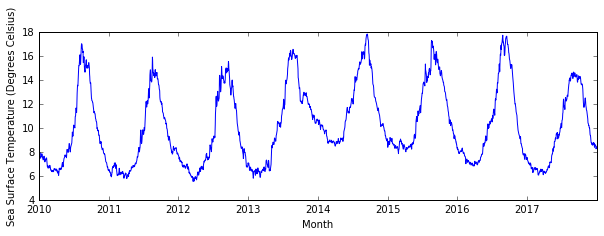

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

x = ans_builtin[0].time
y = ans_builtin[0].mean

plt.rcParams['figure.figsize']=(10,3)
plt.plot(x,y)
plt.xticks()
plt.xlabel('Month')
plt.ylabel('Sea Surface Temperature (Degrees Celsius)')
plt.show()



# File interface example
Here is an example of running a more complex python program that computes a 1 year time series of Sea Surface Temperature using a remote Spark cluster.  The time series code is specified in a local file.  The program to be run has a function called main that accepts a single argument, the `SparkContext`.

In [13]:
t1 = time()
fname = 'local_code.py'
ans = nexuscli_ow.run_file(fname)
t2 = time()
print('Took {} seconds'.format(t2-t1))


[{'std': 0.79299970818917476, 'cnt': 800, 'min': 5.8099976, 'max': 9.75, 'time': 1262304000, 'mean': 7.6744608879089355}, {'std': 0.75502294490043464, 'cnt': 800, 'min': 5.6600037, 'max': 9.230011, 'time': 1262390400, 'mean': 7.5388007164001465}, {'std': 0.80024932219369649, 'cnt': 800, 'min': 5.480011, 'max': 8.9599915, 'time': 1262476800, 'mean': 7.517979621887207}, {'std': 0.8933923083644445, 'cnt': 800, 'min': 5.1700134, 'max': 9.1900024, 'time': 1262563200, 'mean': 7.665588855743408}, {'std': 0.78512138826665478, 'cnt': 800, 'min': 5.5899963, 'max': 9.4599915, 'time': 1262649600, 'mean': 7.806901931762695}, {'std': 0.76624432477778992, 'cnt': 800, 'min': 6.1300049, 'max': 9.6499939, 'time': 1262736000, 'mean': 7.951279640197754}, {'std': 0.69817023021112756, 'cnt': 800, 'min': 5.8999939, 'max': 9.5499878, 'time': 1262822400, 'mean': 7.850428581237793}, {'std': 0.76578071559750238, 'cnt': 800, 'min': 5.3999939, 'max': 9.4400024, 'time': 1262908800, 'mean': 7.626455307006836}, {'std

# Plot the time series
Nice! Let's plot the result.

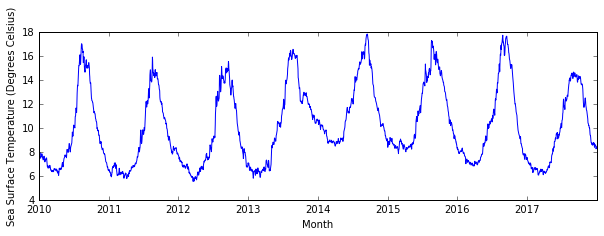

In [14]:
import ast
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
ts = ast.literal_eval(ans)
x = [datetime.fromtimestamp(d['time']) for d in ts]
y = [d['mean'] for d in ts]

plt.rcParams['figure.figsize']=(10,3)
plt.plot(x,y)
plt.xticks()
plt.xlabel('Month')
plt.ylabel('Sea Surface Temperature (Degrees Celsius)')
plt.show()


# Remove the seasonal cycle
Now let's remove the seasonal cycle.  We'll set apply_seasonal_cycle_filter to True and try it again.

In [15]:
t1 = time()
fname = 'local_code.py'
ans = nexuscli_ow.run_file(fname)
t2 = time()
print('Took {} seconds'.format(t2-t1))


[{'std': 0.79299970818917476, 'cnt': 800, 'meanSeasonal': 0.13498549352229539, 'max': 9.75, 'min': 5.8099976, 'time': 1262304000, 'maxSeasonal': 2.2105246056133598, 'minSeasonal': -1.7294778357928902, 'mean': 7.6744608879089355}, {'std': 0.75502294490043464, 'cnt': 800, 'meanSeasonal': -0.0006746779864936769, 'max': 9.230011, 'min': 5.6600037, 'time': 1262390400, 'maxSeasonal': 1.6905355919414848, 'minSeasonal': -1.8794717322772652, 'mean': 7.5388007164001465}, {'std': 0.80024932219369649, 'cnt': 800, 'meanSeasonal': -0.02149577249943313, 'max': 8.9599915, 'min': 5.480011, 'time': 1262476800, 'maxSeasonal': 1.4205160606914848, 'minSeasonal': -2.0594644080585152, 'mean': 7.517979621887207}, {'std': 0.8933923083644445, 'cnt': 800, 'meanSeasonal': 0.12611346135676804, 'max': 9.1900024, 'min': 5.1700134, 'time': 1262563200, 'maxSeasonal': 1.6505270470196098, 'minSeasonal': -2.3694619666522652, 'mean': 7.665588855743408}, {'std': 0.78512138826665478, 'cnt': 800, 'meanSeasonal': 0.2674265373

# Plot the time series again
Let's see what it looks like now.

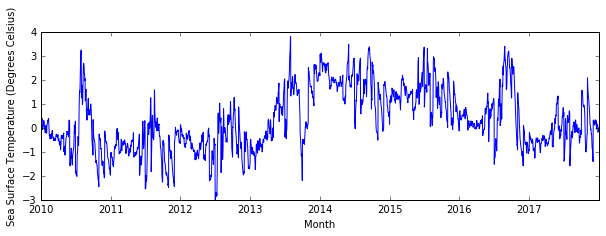

In [16]:
import ast
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
ts = ast.literal_eval(ans)
x = [datetime.fromtimestamp(d['time']) for d in ts]
y = [d['meanSeasonal'] for d in ts]

plt.rcParams['figure.figsize']=(10,3)
plt.plot(x,y)
plt.xticks()
plt.xlabel('Month')
plt.ylabel('Sea Surface Temperature (Degrees Celsius)')
plt.show()


# Anomaly Detected!
Now we can identify "The Blob", an historical Sea Surface Temperature anomaly 
in the Gulf of Alaska.

# Wrap up
Here we demonstrated a new capability in NEXUS to run Python or PySpark code on a remote cluster computer.  The code can be stored in a standard python string, multi-line string, or a local file.

This supplements the built-in analytics that are provided with NEXUS to compute time series, time averaged maps, correlation maps, Hovmoller maps, and more.  Now, authenticated users can run their own custom algorithms on a NEXUS-enabled cloud platform.

The NEXUS software is open source and is part of the Apache incubator __[Science Data Analytics Platform (SDAP)](http://sdap.incubator.apache.org)__.  OceanWorks is sponsored by NASA's Advanced Information Systems Technology (AIST) Program.